데이터 전처리

In [1]:
import pandas as pd
data_raw = pd.read_csv('data_ml.csv')
idx_date = data_raw.index[(
    data_raw['date'] > '1999-12-31') & (
    data_raw['date'] < '2019-01-01')].tolist()
#날짜를 받기 위한 인덱스 생성
data_ml = data_raw.iloc[idx_date]
#날짜 인덱스에 따라 데이터셋 필터링
data_ml.iloc[0:6, 0:6]

features = list(data_ml.iloc[:, 3:95].columns)
# 특성의 열 이름 저장 
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd",
                  "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Factors', ylabel='R1M_Usd'>

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


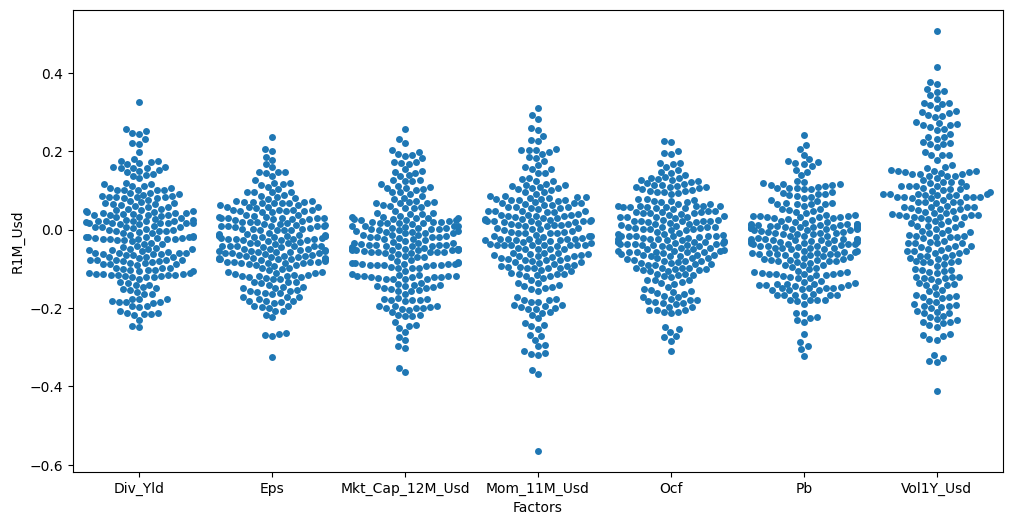

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
cols=[]
cols = features_short+['R1M_Usd', 'date']
data_corr = data_ml[cols]
data_corr = data_corr.groupby('date').corr()[['R1M_Usd']].reset_index()

# 상관계수 계산을 위한 그룹화
data_corr = data_corr.loc[data_corr[data_corr.level_1.str[-7:]!="R1M_Usd"].index]
data_corr.rename(columns={'level_1' : 'Factors'}, inplace=True)
plt.figure(figsize=(12,6))
sns.swarmplot(x="Factors", y="R1M_Usd", data=data_corr)